# Generalize Linear Model

这个章节的内容主要分成三部分

 1. Generalize Linear Model
 2. Linear Regression Model
 3. Logistic Regression Model

本章将按 2、3、1 的顺序来讲解，目的很简单，便于理解。

## Linear Regression Model

Linear Regression Model 就是为了找到数据的 Feature 和对应 Label 之间的线性关系，这里的线性关系可以是 Generalize 上的线性关系，Generalize 就是说模型的输入可以是直接是数据的 Feature，也可以是 Feature 经过函数变换后的结果。“ Regression ”的意思是说建立的模型输出不是一个类别变量，而是一个连续的、与原始的 Label 尽可能接近的实数。

最简单的 Linear Regression Model 是 Linear Regression with One Variable，也即 Feature 的数量是 1。可以通过 Numpy 很容易构造出这样的只有一个 Feature 和一个 Label 的数据集。

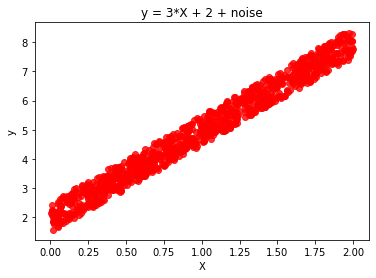

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * 3 + 2

noise = np.random.uniform(-0.5, 0.5, 1000)
X = np.random.uniform(0, 2, 1000)
y = f(X) + noise

plt.scatter(X, y, alpha=0.8, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('y = 3*X + 2 + noise')
plt.show()
plt.close()

执行上面的代码，可以生成这部分内容所需要的数据集。函数 $f(x)$ 定一个了线性关系，即 $Label = 3 \times Feature + 2 + noise$，noise 表示的是一个从 [-0.5, 0.5) 正态分布中产生的随机数。添加 noise 的想法很直接，因为在实际的生活中，采集数据是会有误差的。

在这样的数据集上应用的 Linear Regression Model 方法，设定用于拟合数据集的函数为 $\hat{y}=\theta \cdot x + b$，在这个函数中，如果求解出 $\theta$ 和 $b$，任务就完成了。如何求解呢，可以这样想，一开始随机设置一个 $\theta$ 和 $b$，然后对比 $y$ 和 $\hat{y}$ 的差别，然后修改 $\theta$ 和 $b$ 使得新的 $y$ 和 $\hat{y}$ 的差距越来越小。上面这句话描述了 Machine Learning 中很重要的两个概念 Loss 和 Learning Method。在当前的情况下，Loss 可以选择 Mean Squared Error，用数学公式表示即为 $Loss(y, \hat{y}) = \frac{1}{2} (y - \hat{y})^2=\frac{1}{2} (y - \theta \cdot x - b)^2$。

## Stochastic Graident Descent

Learning Method 的目的是使得 Loss 的值越来越小，即要找到 Loss 的一个极小（极大）值。由于上面的 Loss 函数是关于 $\theta$ 和 $b$ 的二次函数，其他的 $y$ 和 $x$ 都是已知值，也即训练数据。所以 Loss 函数可以表示为 $Loss(\theta, b)$，要使得 Loss 变小，可以让 $\theta_{new} = \theta_{old} - \frac{\partial Loss}{\partial \theta}$，同理 $b$ 的变化方式也一样，知道 Loss 为 0 或者小于一个指定的值，就可以认为找到了理想的 $\theta$ 和 $b$。

$\begin{align*}
\theta & = \theta + \eta \cdot (y - \hat{y}) \cdot x\\
b & = b + \eta \cdot (y - \hat{y})
\end{align*}$

这种一次只取一个数据，然后更新 $\theta$ 和 $b$ 的做法叫做 Stochastic Graident Descent。好处就是实现起来比较简单，缺点呢就是收敛比较慢。

In [59]:
theta = 0.001
b = 0.001
LEARNING_RATE = 1e-5

len = X.shape[0]

EPOCH = 100000
PRINT_STEP = EPOCH / 50
for epoch in range(EPOCH):
    index = np.random.randint(0, len, size=1)
    sample_x = X[index]
    sample_y = y[index]

    y_pred = theta * sample_x + b
    
    loss = sample_y - y_pred
    theta = theta + LEARNING_RATE * loss * sample_x
    b = b + LEARNING_RATE * loss

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, np.sum(loss, 0)))

print('theta is %f, b is %f' % (theta, b))

EPOCH: 0, loss: 5.702487
EPOCH: 2000, loss: 4.246387
EPOCH: 4000, loss: 7.451014
EPOCH: 6000, loss: 4.707458
EPOCH: 8000, loss: 6.580944
EPOCH: 10000, loss: 2.624541
EPOCH: 12000, loss: 5.459484
EPOCH: 14000, loss: 4.498866
EPOCH: 16000, loss: 1.529808
EPOCH: 18000, loss: 2.860503
EPOCH: 20000, loss: 5.301923
EPOCH: 22000, loss: 1.859336
EPOCH: 24000, loss: 1.763593
EPOCH: 26000, loss: 4.456250
EPOCH: 28000, loss: 1.712169
EPOCH: 30000, loss: 2.729030
EPOCH: 32000, loss: 1.924836
EPOCH: 34000, loss: 1.435508
EPOCH: 36000, loss: 3.269342
EPOCH: 38000, loss: 2.211001
EPOCH: 40000, loss: 1.329365
EPOCH: 42000, loss: 0.992258
EPOCH: 44000, loss: 0.849847
EPOCH: 46000, loss: 2.647595
EPOCH: 48000, loss: 2.323677
EPOCH: 50000, loss: 1.305333
EPOCH: 52000, loss: 2.786624
EPOCH: 54000, loss: 2.033283
EPOCH: 56000, loss: 1.772493
EPOCH: 58000, loss: 0.677611
EPOCH: 60000, loss: 1.047534
EPOCH: 62000, loss: 0.318885
EPOCH: 64000, loss: 1.201598
EPOCH: 66000, loss: 1.147488
EPOCH: 68000, loss: 0.

# Batch Gradient Descent

Batch Gradient Descent 和 Stochastic Gradient Descent 的差别在于一次读取一批数据，然后使用这批数据的均值 Gradient，作为下降的参数，这个时候的 Stochastic Gradient Descent 就需要稍作修改，也即

$\begin{align*}
\theta & = \theta + \eta \cdot \frac{1}{N} \sum_i(y_i - \hat{y_i}) \cdot x_i \\
b & = b + \eta \cdot \frac{1}{N} \sum_i(y_i - \hat{y_i})
\end{align*}$

一个批次的数据是 N，均值 Gradient 的计算即为 $\frac{1}{N} \sum_i(y_i - \hat{y_i}) \cdot x_i$

In [62]:
theta = 0.001
b = 0.001
LEARNING_RATE = 1e-5

len = X.shape[0]

BATCH_SIZE = 16
EPOCH = 100000
PRINT_STEP = EPOCH / 25
for epoch in range(EPOCH):
    index = np.random.randint(0, len, size=BATCH_SIZE)
    sample_x = X[index]
    sample_y = y[index]

    y_pred = theta * sample_x + b
    
    loss = sample_y - y_pred
    theta = theta + LEARNING_RATE * np.dot(loss, sample_x) / BATCH_SIZE
    b = b + LEARNING_RATE * np.sum(loss, 0) / BATCH_SIZE

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, np.sum(loss, 0)))

print('theta is %f, b is %f' % (theta, b))

EPOCH: 0, loss: 74.503654
EPOCH: 4000, loss: 88.591875
EPOCH: 8000, loss: 69.983873
EPOCH: 12000, loss: 70.165214
EPOCH: 16000, loss: 58.081916
EPOCH: 20000, loss: 54.520637
EPOCH: 24000, loss: 51.819660
EPOCH: 28000, loss: 46.618814
EPOCH: 32000, loss: 45.092850
EPOCH: 36000, loss: 32.322952
EPOCH: 40000, loss: 34.068937
EPOCH: 44000, loss: 27.267372
EPOCH: 48000, loss: 24.011764
EPOCH: 52000, loss: 25.800358
EPOCH: 56000, loss: 25.676746
EPOCH: 60000, loss: 21.886843
EPOCH: 64000, loss: 21.077662
EPOCH: 68000, loss: 14.952676
EPOCH: 72000, loss: 13.792071
EPOCH: 76000, loss: 12.978711
EPOCH: 80000, loss: 14.047994
EPOCH: 84000, loss: 15.789301
EPOCH: 88000, loss: 11.878911
EPOCH: 92000, loss: 7.762969
EPOCH: 96000, loss: 9.583927
theta is 2.444906, b is 2.007065
